In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
plt.rcParams['font.size'] = 16
 
def survey(results, category_names, Task=2):
    """
    Parameters
    ----------
    results : 字典
        案例的数据源，且字典值的长度与category_names对应
    category_names : 字符串列表
        每个种类的标签
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    if Task == 2:
        data = data / 60
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))
 
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
 
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(i, widths, left=starts, height=0.4,
                        label=colname, color=color)
 
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color='black', fontsize=20, fmt='%.2f')
    
    plt.yticks([0, 1, 2, 3, 4, 5], category_names, rotation=30)
    plt.xlabel('Time (seconds)')
 
category_names = ['Review Load', 'Meta Load', 'Group and Aggregate', 'Join', 'Sort', 'Write']

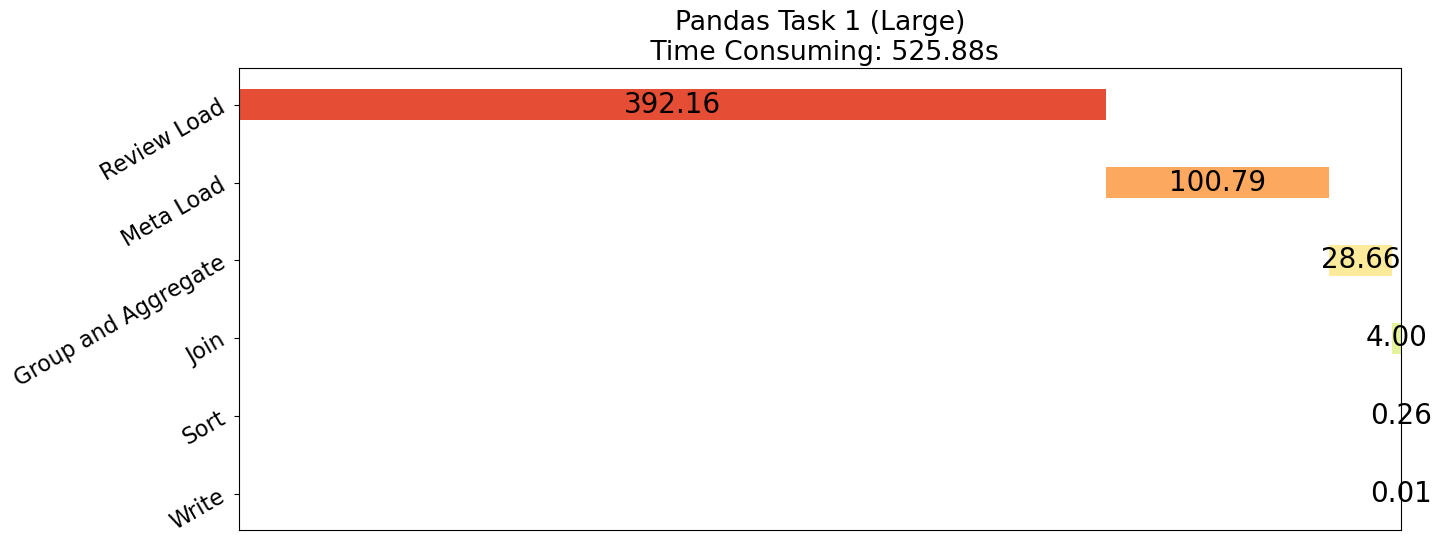

In [2]:
results = {'Pandas' : [392.16, 100.79, 28.66, 4.00, 0.26, 0.01]}
survey(results, category_names, Task=1)

plt.title(f'Pandas Task 1 (Large)\n Time Consuming: {round(sum(results["Pandas"]), 3)}s')
plt.show()

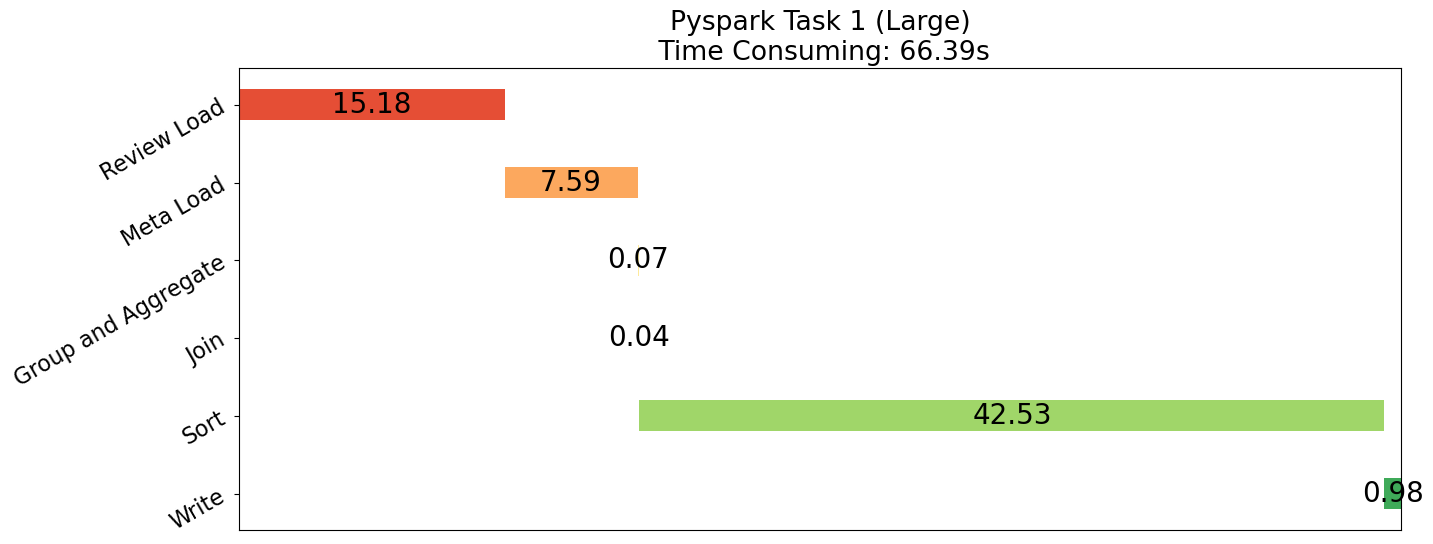

In [3]:
results = {'Pyspark': [15.18, 7.59, 0.07, 0.04, 42.53, 0.98]}
survey(results, category_names, Task=1)

plt.title(f'Pyspark Task 1 (Large)\n Time Consuming: {round(sum(results["Pyspark"]), 3)}s')
plt.show()